# Multiple Correspondence Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scientisttools.decomposition import MCA
from scientisttools.extractfactor import get_eig,get_mca_ind,get_mca_mod,get_mca_var
from scientisttools.pyplot import plotMCA,plot_eigenvalues
from scientisttools.ggplot import fviz_mca_ind,fviz_mca_mod,fviz_mca_var
from plydata import *

In [2]:
# Chargement des données
D = pd.read_excel("Data_Methodes_Factorielles.xlsx",sheet_name="ACM_CANINES",index_col=0)
display(D)

,Taille,Velocite,Affection,Cote,Fonction
Chien,,,,,
Beauceron,Taille++,Veloc++,Affec+,2.0,utilite
Basset,Taill-,Velo-,Affe-,4.5,chasse
Berger All,Taille++,Veloc++,Affec+,2.5,utilite
Boxer,Taille+,Veloc+,Affec+,3.0,compagnie
Bull-Dog,Taill-,Velo-,Affec+,1.5,compagnie
Bull-Mastif,Taille++,Velo-,Affe-,1.0,utilite
Caniche,Taill-,Veloc+,Affec+,4.0,compagnie
Labrador,Taille+,Veloc+,Affec+,3.5,chasse


In [3]:
DActives = D[['Taille','Velocite','Affection']]
display(DActives)

,Taille,Velocite,Affection
Chien,,,
Beauceron,Taille++,Veloc++,Affec+
Basset,Taill-,Velo-,Affe-
Berger All,Taille++,Veloc++,Affec+
Boxer,Taille+,Veloc+,Affec+
Bull-Dog,Taill-,Velo-,Affec+
Bull-Mastif,Taille++,Velo-,Affe-
Caniche,Taill-,Veloc+,Affec+
Labrador,Taille+,Veloc+,Affec+


## Approche 1 : Tableau disjonctif complet

In [4]:
dummies = pd.get_dummies(DActives)
dummies

,Taille_Taill-,Taille_Taille+,Taille_Taille++,Velocite_Velo-,Velocite_Veloc+,Velocite_Veloc++,Affection_Affe-,Affection_Affec+
Chien,,,,,,,,
Beauceron,0,0,1,0,0,1,0,1
Basset,1,0,0,1,0,0,1,0
Berger All,0,0,1,0,0,1,0,1
Boxer,0,1,0,0,1,0,0,1
Bull-Dog,1,0,0,1,0,0,0,1
Bull-Mastif,0,0,1,1,0,0,1,0
Caniche,1,0,0,0,1,0,0,1
Labrador,0,1,0,0,1,0,0,1


MCA(figsize=(20, 8), matrix_type='disjonctif',
    mod_labels=array(['Taille_Taill-', 'Taille_Taille+', 'Taille_Taille++',
       'Velocite_Velo-', 'Velocite_Veloc+', 'Velocite_Veloc++',
       'Affection_Affe-', 'Affection_Affec+'], dtype=object),
    row_labels=array(['Beauceron', 'Basset', 'Berger All', 'Boxer', 'Bull-Dog',
       'Bull-Mastif', 'Caniche', 'Labrador'], dtype=object))

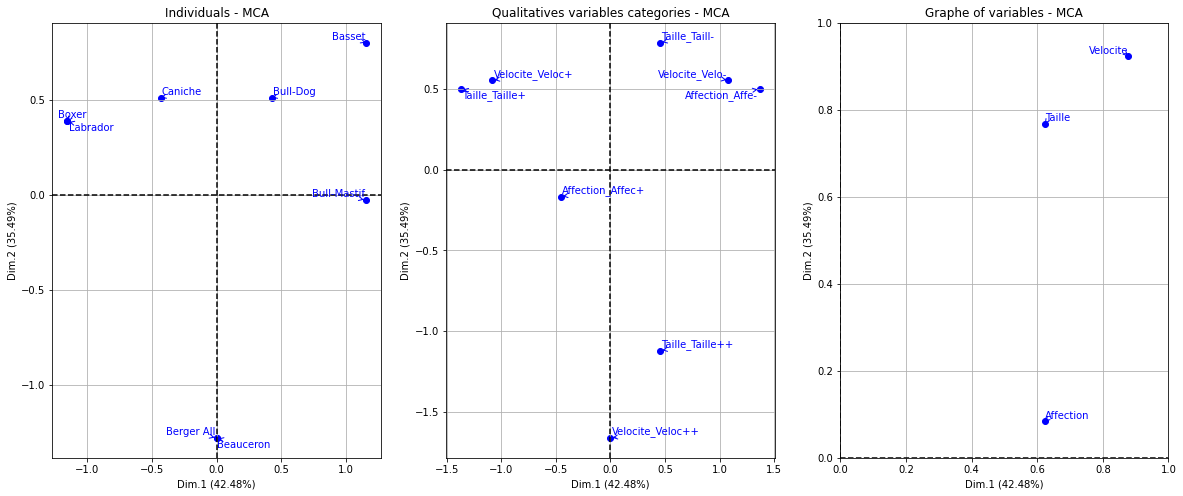

In [5]:
my_mca = MCA(n_components=None,
             row_labels=dummies.index.values,
             var_labels=None,
             mod_labels=dummies.columns.values,
             matrix_type="disjonctif",
             benzecri=True,
             greenacre=True,
             row_sup_labels=None,
             quali_sup_labels=None,
             quanti_sup_labels=None,
             graph=True,
             figsize=(20,8))
my_mca.fit(dummies)

### Valeurs propres

In [6]:
eig = get_eig(my_mca)
print(eig)

       eigenvalue  difference  proportion  cumulative
Dim.1    0.708031    0.116542   42.481875   42.481875
Dim.2    0.591489    0.329498   35.489362   77.971237
Dim.3    0.261992    0.192245   15.719509   93.690746
Dim.4    0.069747    0.034339    4.184791   97.875538
Dim.5    0.035408    0.035408    2.124462  100.000000


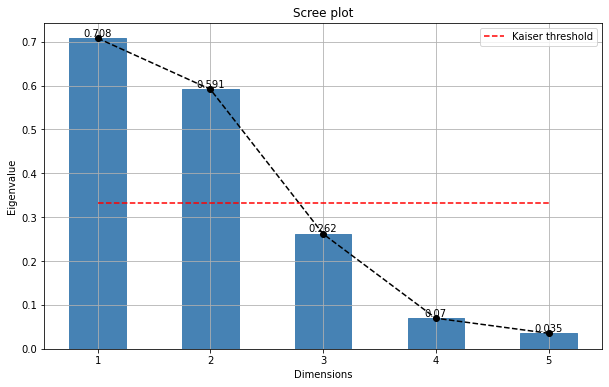

In [7]:
fig, axe = plt.subplots(figsize=(10,6))
plot_eigenvalues(my_mca,choice="eigenvalue",add_labels=True,add_kaiser=True,ax=axe)

##### Correction de Benzécri

In [8]:
benzecri =my_mca.benzecri_correction_
print(benzecri)

       eigenvalue  proportion  cumulative
Dim.1    0.315897   67.811269   67.811269
Dim.2    0.149950   32.188731  100.000000


##### Correction de Greenacre

In [9]:
greenacre = my_mca.greenacre_correction_
print(greenacre)

       eigenvalue  proportion  cumulative
Dim.1    0.315897   56.861407   56.861407
Dim.2    0.149950   26.991037   83.852444


### Individus

In [10]:
row = get_mca_ind(my_mca)
print(row.keys())

dict_keys(['coord', 'cos2', 'contrib', 'infos'])


#### Coordonnées

In [11]:
row_coord = row["coord"]
print(row_coord >> select("Dim.1","Dim.2")>> head())

                   Dim.1     Dim.2
Beauceron   8.719576e-15 -1.279924
Basset      1.150779e+00  0.799057
Berger All  8.133229e-15 -1.279924
Boxer      -1.150779e+00  0.385124
Bull-Dog    4.284137e-01  0.509675


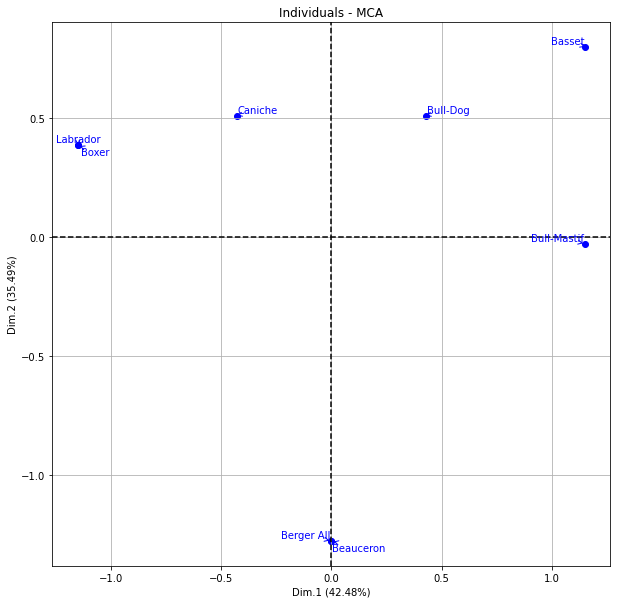

In [12]:
fig, axe = plt.subplots(figsize=(10,10))
plotMCA(my_mca,choice="ind",repel=True,ax=axe)

#### Cosinus carrés

In [13]:
row_cos2 = row["cos2"]
print(row_cos2 >> select("Dim.1","Dim.2")>> head())

                   Dim.1     Dim.2
Beauceron   4.561861e-29  0.982924
Basset      6.272969e-01  0.302444
Berger All  3.968965e-29  0.982924
Boxer       7.945760e-01  0.088993
Bull-Dog    1.501677e-01  0.212538


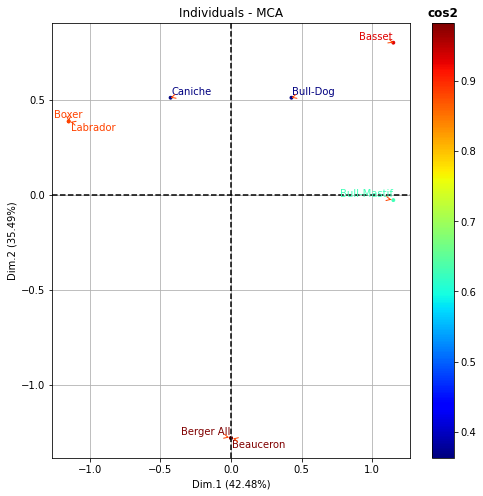

In [14]:
fig,axe = plt.subplots(figsize=(8,8))
plotMCA(my_mca,choice="ind",color="cos2",repel=True,ax=axe)

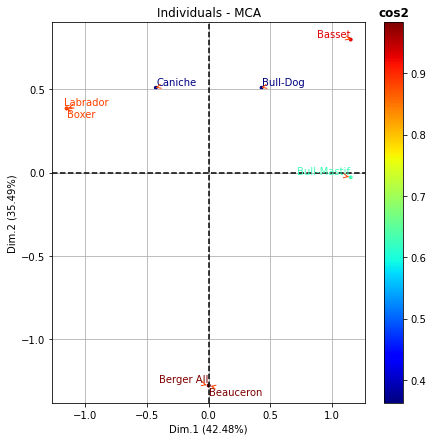

In [15]:
fig,axe = plt.subplots(figsize=(7,7))
plotMCA(my_mca,color="cos2",repel=True,ax=axe)

#### Contribution 

In [16]:
row_contrib = row["contrib"]
print(row_contrib >> select("Dim.1","Dim.2")>> head())

                   Dim.1      Dim.2
Beauceron   1.342296e-27  34.620365
Basset      2.337985e+01  13.493329
Berger All  1.167841e-27  34.620365
Boxer       2.337985e+01   3.134479
Bull-Dog    3.240293e+00   5.489722


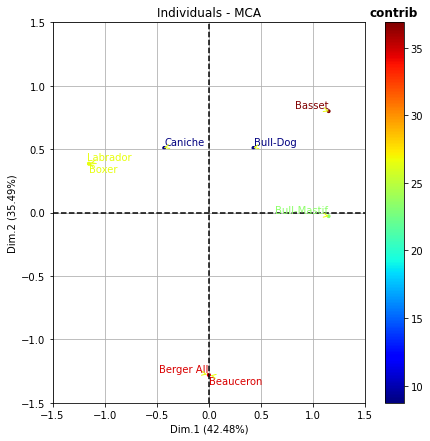

In [17]:
fig,axe = plt.subplots(figsize=(7,7))
plotMCA(my_mca,choice="ind",color="contrib",repel=True,xlim=(-1.5,1.5),ylim=(-1.5,1.5))

##### Informations supplémentaires

In [18]:
row_infos = row["infos"]
print(row_infos >> head())

              d(i,G)   p(i)    I(i,G)
Beauceron   1.290994  0.125  0.208333
Basset      1.452966  0.125  0.263889
Berger All  1.290994  0.125  0.208333
Boxer       1.290994  0.125  0.208333
Bull-Dog    1.105542  0.125  0.152778


#### Les modalités

In [19]:
mod = get_mca_mod(my_mca)

##### Coordonnées

In [20]:
mod_coord = mod["coord"]
print(mod_coord >> select("Dim.1","Dim.2")>>head())

                    Dim.1     Dim.2
Taille_Taill-    0.455874  0.788128
Taille_Taille+  -1.367621  0.500758
Taille_Taille++  0.455874 -1.121966
Velocite_Velo-   1.081461  0.554740
Velocite_Veloc+ -1.081461  0.554740


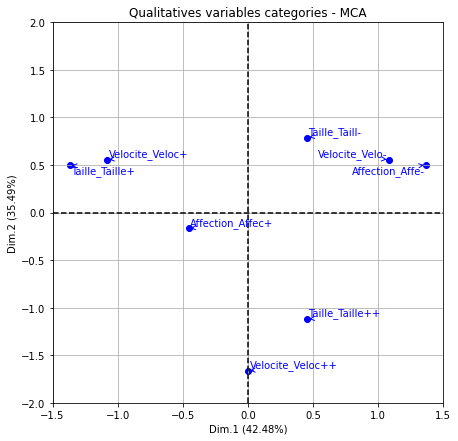

In [21]:
fig,axe = plt.subplots(figsize=(7,7))
plotMCA(my_mca,choice="mod",repel=True,ax=axe,xlim=(-1.5,1.5),ylim=(-2,2))

#### Cosinus carré

In [22]:
mod_cos2 = mod["cos2"]
print(mod_cos2 >> select("Dim.1","Dim.2")>>head())

                    Dim.1     Dim.2
Taille_Taill-    0.124693  0.372687
Taille_Taille+   0.623463  0.083586
Taille_Taille++  0.124693  0.755285
Velocite_Velo-   0.701735  0.184642
Velocite_Veloc+  0.701735  0.184642


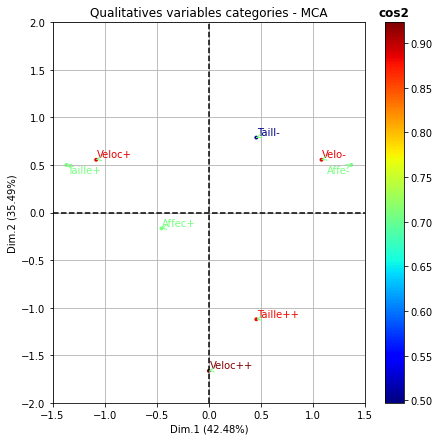

In [23]:
fig,axe = plt.subplots(figsize=(7,7))
plotMCA(my_mca,choice="mod",color="cos2",repel=True,short_labels=True,ax=axe,
        xlim=(-1.5,1.5),ylim=(-2,2))

##### Contributions

In [24]:
mod_contrib = mod["contrib"]
print(mod_cos2 >> select("Dim.1","Dim.2")>>head())

                    Dim.1     Dim.2
Taille_Taill-    0.124693  0.372687
Taille_Taille+   0.623463  0.083586
Taille_Taille++  0.124693  0.755285
Velocite_Velo-   0.701735  0.184642
Velocite_Veloc+  0.701735  0.184642


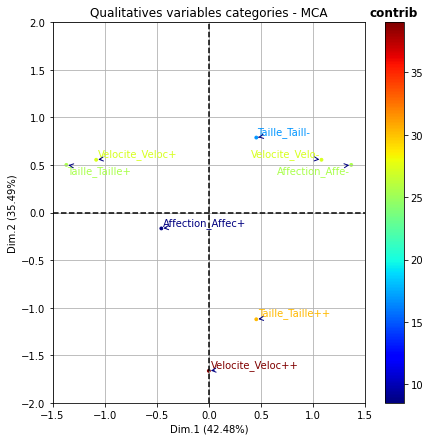

In [25]:
fig,axe = plt.subplots(figsize=(7,7))
plotMCA(my_mca,choice="mod",color="contrib",repel=True,short_labels=False,ax=axe,
        xlim=(-1.5,1.5),ylim=(-2,2))

#### Informations

In [26]:
mod_infos = mod["infos"]
print(mod_infos >> head())

                   d(k,G)      p(k)    I(k,G)
Taille_Taill-    1.290994  0.125000  0.208333
Taille_Taille+   1.732051  0.083333  0.250000
Taille_Taille++  1.290994  0.125000  0.208333
Velocite_Velo-   1.290994  0.125000  0.208333
Velocite_Veloc+  1.290994  0.125000  0.208333


### Les variables

In [27]:
var = get_mca_var(my_mca)
print(var.keys())

dict_keys(['chi2', 'inertia', 'eta2', 'cos2', 'contrib'])


In [28]:
chi2 = var["chi2"]
print(chi2.keys())

dict_keys(['statistic', 'pvalue'])


In [29]:
display(chi2["statistic"])
display(chi2["pvalue"])

,Taille,Velocite,Affection
Taille,16.000000,8.000000,0.888889
Velocite,8.000000,16.000000,4.444444
Affection,0.888889,4.444444,3.555556


,Taille,Velocite,Affection
Taille,0.003019,0.091578,0.641180
Velocite,0.091578,0.003019,0.108368
Affection,0.641180,0.108368,0.059346


### Rapport de corrélation

In [30]:
display(mod_coord)

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
Taille_Taill-,4.558738e-01,0.788128,-0.900396,-1.200054e-01,-0.112184
Taille_Taille+,-1.367621e+00,0.500758,0.836329,3.600163e-01,-0.223148
Taille_Taille++,4.558738e-01,-1.121966,0.342844,-1.200054e-01,0.260949
Velocite_Velo-,1.081461e+00,0.554740,0.099781,4.046921e-01,0.125062
Velocite_Veloc+,-1.081461e+00,0.554740,0.099781,-4.046921e-01,0.125062
Velocite_Veloc++,1.122634e-14,-1.664220,-0.299344,5.855604e-16,-0.375185
Affection_Affe-,1.367621e+00,0.500758,0.836329,-3.600163e-01,-0.223148
Affection_Affec+,-4.558738e-01,-0.166919,-0.278776,1.200054e-01,0.074383


In [31]:
eta2 = var["eta2"]
display(eta2)

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
Taille,0.623463,0.767672,0.522957,0.043204,0.042704
Velocite,0.877168,0.923210,0.029869,0.122832,0.046921
Affection,0.623463,0.083586,0.233149,0.043204,0.016598


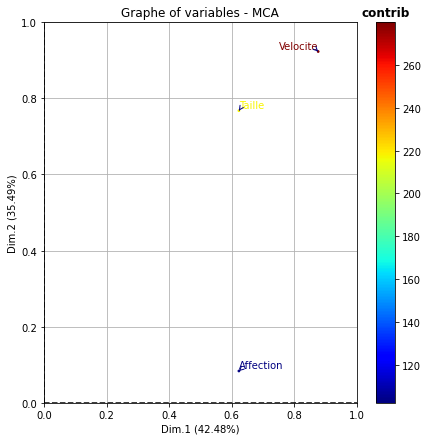

In [32]:
fig,axe = plt.subplots(figsize=(7,7))
plotMCA(my_mca,choice="var",color="contrib",repel=True,short_labels=False,ax=axe,
        xlim=(0,1),ylim=(0,1))

### ACM sur données originales

MCA(figsize=(20, 8),
    row_labels=Index(['Beauceron', 'Basset', 'Berger All', 'Boxer', 'Bull-Dog', 'Bull-Mastif',
       'Caniche', 'Labrador'],
      dtype='object', name='Chien'),
    var_labels=Index(['Taille', 'Velocite', 'Affection'], dtype='object'))

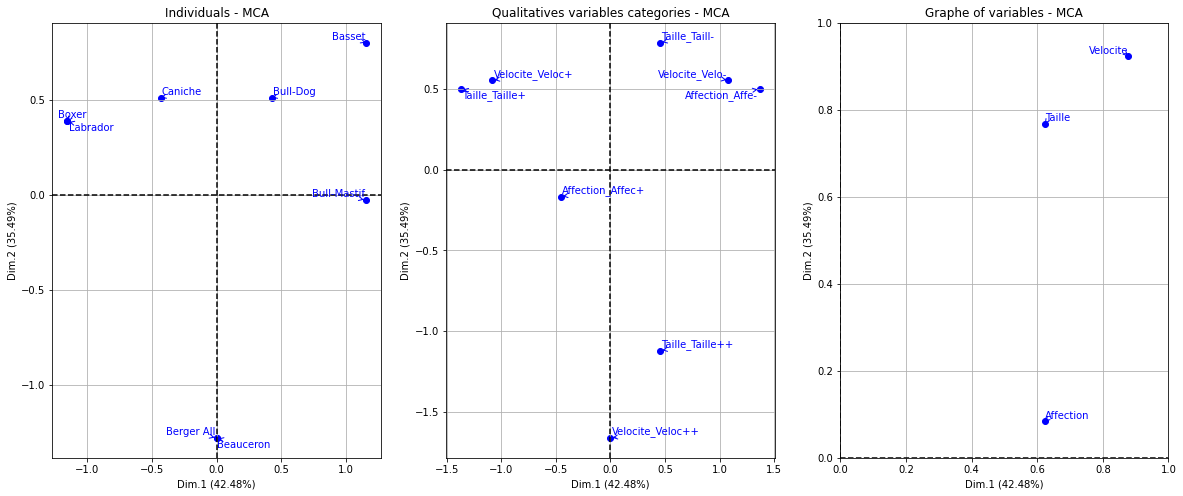

In [33]:
my_mca2 = MCA(n_components=None,
             row_labels=DActives.index,
             var_labels=DActives.columns,
             mod_labels=None,
             matrix_type="completed",
             benzecri=True,
             greenacre=True,
             row_sup_labels=None,
             quali_sup_labels=None,
             quanti_sup_labels=None,
             graph=True,
             figsize=(20,8))
my_mca2.fit(DActives)

In [34]:
pd.DataFrame(my_mca2.row_coord_,index=my_mca2.row_labels_,columns=my_mca.dim_index_)

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
Chien,,,,,
Beauceron,8.719576e-15,-1.279924,-0.153220,-6.219819e-17,-0.070598
Basset,1.150779e+00,0.799057,0.023258,-9.507874e-02,-0.372484
Berger All,8.133229e-15,-1.279924,-0.153220,2.064286e-16,-0.070598
Boxer,-1.150779e+00,0.385124,0.428076,9.507874e-02,-0.041990
Bull-Dog,4.284137e-01,0.509675,-0.702933,5.107897e-01,0.154577
Bull-Mastif,1.150779e+00,-0.028809,0.832894,-9.507874e-02,0.288504
Caniche,-4.284137e-01,0.509675,-0.702933,-5.107897e-01,0.154577
Labrador,-1.150779e+00,0.385124,0.428076,9.507874e-02,-0.041990


In [35]:
Drow_sup = pd.read_excel("Data_Methodes_Factorielles.xlsx",sheet_name="ACM_CANINES_SUPP",index_col=0)
display(Drow_sup)

,Taille,Velocite,Affection
Chien,,,
Levrier,Taille++,Veloc++,Affe-


In [36]:
row_sup_coord = my_mca2.transform(Drow_sup)
pd.DataFrame(row_sup_coord,index=Drow_sup.index,columns=my_mca.dim_index_)

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
Chien,,,,,
Levrier,0.722366,-0.990542,0.572971,-0.605868,-0.597659


In [37]:
my_mca2._compute_row_sup_stats(Drow_sup)

In [38]:
my_mca2.row_sup_coord_

array([[ 0.72236576, -0.99054221,  0.57297139, -0.60586847, -0.59765925]])

In [39]:
my_mca2.row_sup_cos2_

array([[0.20418742, 0.3839376 , 0.12846373, 0.14363867, 0.13977257]])

#### Variables illustratives quantitatives

In [40]:
Xquant_sup = D["Cote"].to_frame()
display(Xquant_sup)

,Cote
Chien,
Beauceron,2.0
Basset,4.5
Berger All,2.5
Boxer,3.0
Bull-Dog,1.5
Bull-Mastif,1.0
Caniche,4.0
Labrador,3.5


In [41]:
var_quant_sup = my_mca2._compute_quanti_sup_stats(Xquant_sup)
display(var_quant_sup.keys())

dict_keys(['coord', 'cos2'])

In [42]:
var_quant_sup_coord = var_quant_sup["coord"]
pd.DataFrame(var_quant_sup_coord,index=Xquant_sup.columns,columns=my_mca.dim_index_)

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
Cote,-0.288099,0.441753,-0.178114,-0.48829,-0.654134


In [43]:
var_quant_sup_cos2= var_quant_sup["cos2"]
pd.DataFrame(var_quant_sup_cos2,index=Xquant_sup.columns,columns=my_mca.dim_index_)

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
Cote,0.083001,0.195146,0.031725,0.238428,0.427892


#### Variables qualitatives supplémentaires

In [44]:
# Variables qualitatives
Xqual_sup = D["Fonction"].to_frame()
display(Xqual_sup)

,Fonction
Chien,
Beauceron,utilite
Basset,chasse
Berger All,utilite
Boxer,compagnie
Bull-Dog,compagnie
Bull-Mastif,utilite
Caniche,compagnie
Labrador,chasse


In [45]:
mod_sup = my_mca2._compute_quali_sup_stats(Xqual_sup)
print(mod_sup.keys())

dict_keys(['coord', 'cos2', 'dist', 'stats', 'vtest'])


In [46]:
mod_sup_coord = mod_sup["coord"]
mod_sup_coord

,0,1,2,3,4
Fonction_chasse,-4.749922e-15,0.769866,0.440884,9.721442e-16,-1.101330
Fonction_compagnie,-4.558738e-01,0.608722,-0.636767,1.200054e-01,0.473271
Fonction_utilite,4.558738e-01,-1.121966,0.342844,-1.200054e-01,0.260949


In [47]:
mod_sup_cos2 = mod_sup["cos2"]
mod_sup_cos2

,0,1,2,3,4
Fonction_chasse,1.128088e-29,0.296347,0.097190,4.725322e-31,0.606464
Fonction_compagnie,1.700353e-01,0.303172,0.331749,1.178288e-02,0.183261
Fonction_utilite,1.246926e-01,0.755285,0.070525,8.640781e-03,0.040857


In [48]:
mod_sup_dist = mod_sup["dist"]
pd.DataFrame(mod_sup_dist,columns=["Dist"])

,Dist
Fonction_chasse,3.000000
Fonction_compagnie,1.666667
Fonction_utilite,1.666667


In [49]:
mod_sup_stats = mod_sup["stats"]
display(mod_sup_stats)

,sum,mean
Fonction_chasse,2.0,0.250
Fonction_compagnie,3.0,0.375
Fonction_utilite,3.0,0.375


In [50]:
mod_sup_vtest = mod_sup["vtest"]
mod_sup_vtest

,0,1,2,3,4
Fonction_chasse,-7.255626e-15,1.175989,0.673462,1.484975e-15,-1.682309
Fonction_compagnie,-9.342633e-01,1.247510,-1.304983,2.459379e-01,0.969917
Fonction_utilite,9.342633e-01,-2.299347,0.702620,-2.459379e-01,0.534786


MCA(figsize=(20, 8), quali_sup_labels=['Fonction'], quanti_sup_labels=['Cote'],
    row_labels=Index(['Beauceron', 'Basset', 'Berger All', 'Boxer', 'Bull-Dog', 'Bull-Mastif',
       'Caniche', 'Labrador'],
      dtype='object', name='Chien'),
    var_labels=Index(['Taille', 'Velocite', 'Affection'], dtype='object'))

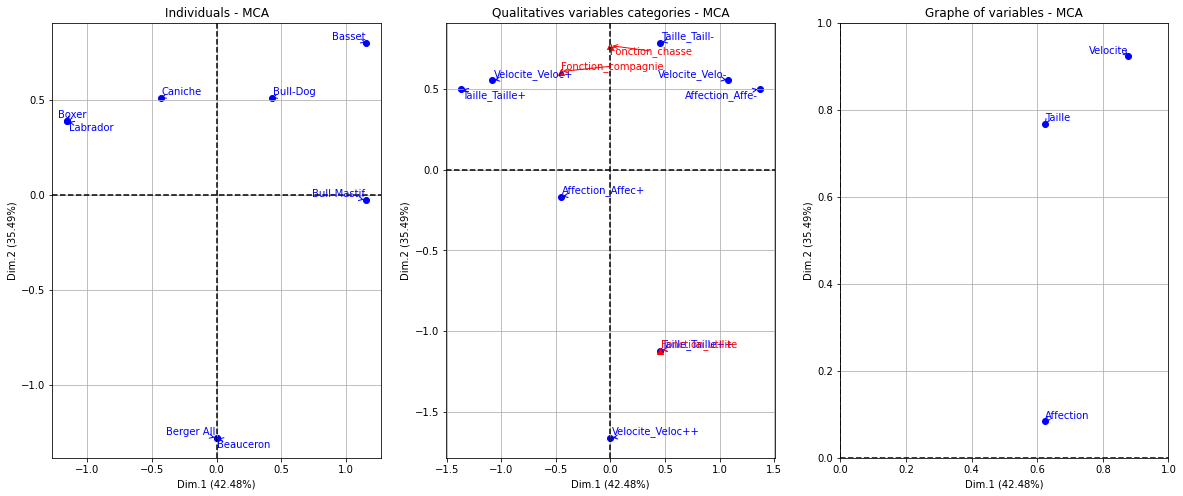

In [51]:
my_mca3 = MCA(n_components=None,
             row_labels=DActives.index,
             var_labels=DActives.columns,
             mod_labels=None,
             matrix_type="completed",
             benzecri=True,
             greenacre=True,
             row_sup_labels=None,
             quali_sup_labels=["Fonction"],
             quanti_sup_labels=["Cote"],
             graph=True,
             figsize=(20,8))
my_mca3.fit(D)

In [52]:
eig3 = get_eig(my_mca3)
display(eig3)

,eigenvalue,difference,proportion,cumulative
Dim.1,0.708031,0.116542,42.481875,42.481875
Dim.2,0.591489,0.329498,35.489362,77.971237
Dim.3,0.261992,0.192245,15.719509,93.690746
Dim.4,0.069747,0.034339,4.184791,97.875538
Dim.5,0.035408,0.035408,2.124462,100.000000


In [53]:
row = get_mca_ind(my_mca3)
print(row.keys())

dict_keys(['coord', 'cos2', 'contrib', 'infos'])


In [54]:
row_coord = row["coord"]
display(row_coord)

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
Chien,,,,,
Beauceron,8.719576e-15,-1.279924,-0.153220,-6.219819e-17,-0.070598
Basset,1.150779e+00,0.799057,0.023258,-9.507874e-02,-0.372484
Berger All,8.133229e-15,-1.279924,-0.153220,2.064286e-16,-0.070598
Boxer,-1.150779e+00,0.385124,0.428076,9.507874e-02,-0.041990
Bull-Dog,4.284137e-01,0.509675,-0.702933,5.107897e-01,0.154577
Bull-Mastif,1.150779e+00,-0.028809,0.832894,-9.507874e-02,0.288504
Caniche,-4.284137e-01,0.509675,-0.702933,-5.107897e-01,0.154577
Labrador,-1.150779e+00,0.385124,0.428076,9.507874e-02,-0.041990


In [55]:
mod = get_mca_mod(my_mca)
print(mod.keys())

dict_keys(['coord', 'corrected_coord', 'cos2', 'contrib', 'vtest', 'infos'])


In [56]:
mod_infos = mod["infos"]
print(mod_infos)

                    d(k,G)      p(k)    I(k,G)
Taille_Taill-     1.290994  0.125000  0.208333
Taille_Taille+    1.732051  0.083333  0.250000
Taille_Taille++   1.290994  0.125000  0.208333
Velocite_Velo-    1.290994  0.125000  0.208333
Velocite_Veloc+   1.290994  0.125000  0.208333
Velocite_Veloc++  1.732051  0.083333  0.250000
Affection_Affe-   1.732051  0.083333  0.250000
Affection_Affec+  0.577350  0.250000  0.083333


In [57]:
mod_coord = mod["coord"]
print(mod_coord)

                         Dim.1     Dim.2     Dim.3         Dim.4     Dim.5
Taille_Taill-     4.558738e-01  0.788128 -0.900396 -1.200054e-01 -0.112184
Taille_Taille+   -1.367621e+00  0.500758  0.836329  3.600163e-01 -0.223148
Taille_Taille++   4.558738e-01 -1.121966  0.342844 -1.200054e-01  0.260949
Velocite_Velo-    1.081461e+00  0.554740  0.099781  4.046921e-01  0.125062
Velocite_Veloc+  -1.081461e+00  0.554740  0.099781 -4.046921e-01  0.125062
Velocite_Veloc++  1.122634e-14 -1.664220 -0.299344  5.855604e-16 -0.375185
Affection_Affe-   1.367621e+00  0.500758  0.836329 -3.600163e-01 -0.223148
Affection_Affec+ -4.558738e-01 -0.166919 -0.278776  1.200054e-01  0.074383


In [58]:
row["infos"]

,"d(i,G)",p(i),"I(i,G)"
Chien,,,
Beauceron,1.290994,0.125,0.208333
Basset,1.452966,0.125,0.263889
Berger All,1.290994,0.125,0.208333
Boxer,1.290994,0.125,0.208333
Bull-Dog,1.105542,0.125,0.152778
Bull-Mastif,1.452966,0.125,0.263889
Caniche,1.105542,0.125,0.152778
Labrador,1.290994,0.125,0.208333


In [59]:
my_mca3.inertia_

1.6666666666666665

### ACM sur données

In [60]:
D = pd.read_excel("Data_Methodes_Factorielles.xlsx",sheet_name="ACM_CARS",index_col=None)
display(D)

,Origin,Size,Type,Home,Income,Marital,Sex
0,American,Large,Family,Own,1_Income,Married_With_Kids,Male
1,Japanese,Small,Sporty,Own,1_Income,Single,Male
2,Japanese,Small,Family,Own,2_Incomes,Married,Male
3,American,Large,Family,Rent,1_Income,Single,Male
4,American,Medium,Family,Own,2_Incomes,Married_With_Kids,Male
...,...,...,...,...,...,...,...
329,American,Medium,Family,Own,1_Income,Married_With_Kids,Male
330,European,Small,Sporty,Rent,1_Income,Single,Male
331,American,Medium,Family,Rent,1_Income,Single,Female
332,Japanese,Medium,Family,Rent,2_Incomes,Married,Female


In [61]:
my_mca4 = MCA(n_components=None,
             row_labels=None,
             var_labels=D.columns,
             mod_labels=None,
             matrix_type="completed",
             benzecri=True,
             greenacre=True,
             row_sup_labels=None,
             quali_sup_labels=None,
             quanti_sup_labels=None,
             graph=False,
             figsize=(20,8))
my_mca4.fit(D)

MCA(figsize=(20, 8), graph=False,
    var_labels=Index(['Origin', 'Size', 'Type', 'Home', 'Income', 'Marital', 'Sex'], dtype='object'))

In [62]:
row3 = get_mca_ind(my_mca4)
display(row3["coord"])

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6,Dim.7,Dim.8,Dim.9,Dim.10,Dim.11,Dim.12
row_1,-0.409260,1.087816,0.502596,0.031782,0.054829,0.021965,-0.423248,0.111268,-0.184520,-0.195959,0.090873,-0.350352
row_2,0.819813,-0.222057,0.378136,0.097232,-0.210917,-0.050534,-0.194576,-0.163099,-0.443573,-0.223460,-0.184660,0.009356
row_3,-0.219293,-0.532847,0.159535,-0.321312,0.094489,-0.411387,-0.267053,0.469523,-0.037934,-0.198146,-0.294807,0.089143
row_4,0.438170,1.179864,0.212335,-0.009725,0.631115,-0.052913,-0.346335,0.099503,0.237225,-0.235357,0.174826,0.148118
row_5,-0.675013,0.360023,0.094197,0.300440,-0.174056,-0.455086,0.175224,0.083313,-0.200503,0.333626,0.024802,0.186857
...,...,...,...,...,...,...,...,...,...,...,...,...
row_330,-0.299198,0.653484,0.060390,0.356178,-0.276979,-0.387739,0.185855,0.092270,-0.233454,0.277040,-0.220596,-0.328872
row_331,1.079145,-0.146768,0.315051,0.671786,0.101091,0.494923,-0.160106,0.355531,0.338013,0.308607,0.163998,0.051868
row_332,0.395790,0.635826,-0.616444,0.256948,0.331487,-0.168027,0.154077,-0.393885,0.406622,0.228646,-0.209832,0.058620
row_333,-0.190472,-0.357573,-0.704083,-0.142953,0.417358,-0.445398,0.121835,0.024817,0.557904,-0.151337,0.250232,-0.085366


In [63]:
col4 = get_mca_mod(my_mca4)
display(col4["coord"])

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6,Dim.7,Dim.8,Dim.9,Dim.10,Dim.11,Dim.12
Origin_American,-0.403473,0.812864,-0.043983,-0.010940,0.580578,0.041380,0.054838,-0.168933,-0.384468,0.531181,-0.202130,0.072482
Origin_European,-0.056844,-0.555184,0.388053,1.527663,-0.231008,1.461025,0.097540,0.877352,0.908300,0.051970,0.003363,0.013056
Origin_Japanese,0.320820,-0.467757,-0.070160,-0.399089,-0.378230,-0.420955,-0.067555,-0.105981,0.049050,-0.416269,0.152232,-0.058392
Size_Large,-0.694886,1.566557,0.803534,-0.388621,0.827714,0.751141,-0.695938,-0.027451,0.079815,-1.023859,0.653254,-0.053992
Size_Medium,-0.256244,0.096485,-0.518716,0.547285,-0.072848,-0.353571,0.756561,-0.071313,-0.028141,-0.094503,0.083883,-0.026210
Size_Small,0.432554,-0.525826,0.260864,-0.402948,-0.162202,0.121229,-0.512886,0.074226,0.004077,0.373027,-0.260028,0.039492
Type_Family,-0.420123,0.360167,-0.290575,0.112489,-0.081478,-0.411697,-0.336657,0.223830,0.311031,-0.088327,-0.262606,0.056163
Type_Sporty,0.660357,-0.669622,0.127193,0.554426,0.281485,0.275736,-0.118319,-0.333016,-0.683643,0.062788,0.425389,-0.102381
Type_Work,0.057473,0.153905,0.686621,-1.450783,-0.290002,0.785320,1.317038,-0.067531,0.339755,0.161359,0.011151,0.020002
Home_Own,-0.388715,-0.094273,0.178173,0.074128,-0.192705,0.113272,0.022833,-0.058966,-0.238280,-0.158983,-0.216564,0.004536


In [64]:
my_mca4.benzecri_correction_

,eigenvalue,proportion,cumulative
Dim.1,0.044737,75.518928,75.518928
Dim.2,0.011256,19.001209,94.520137
Dim.3,0.002135,3.604741,98.124877
Dim.4,0.000993,1.676723,99.801600
Dim.5,0.000076,0.128432,99.930032
Dim.6,0.000041,0.069968,100.000000


In [65]:
my_mca4.greenacre_correction_

,eigenvalue,proportion,cumulative
Dim.1,0.044737,55.739008,55.739008
Dim.2,0.011256,14.024412,69.763420
Dim.3,0.002135,2.660587,72.424007
Dim.4,0.000993,1.237556,73.661563
Dim.5,0.000076,0.094793,73.756356
Dim.6,0.000041,0.051642,73.807998


### Extraction des résultats

#### Résultats sur les individus

In [66]:
row_mca = get_mca_ind(my_mca4)
print(row_mca.keys())

dict_keys(['coord', 'cos2', 'contrib', 'infos'])


##### Coordonnées

In [67]:
row_mca_coord = row_mca["coord"]
display(row_mca_coord >> head(6))

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6,Dim.7,Dim.8,Dim.9,Dim.10,Dim.11,Dim.12
row_1,-0.409260,1.087816,0.502596,0.031782,0.054829,0.021965,-0.423248,0.111268,-0.184520,-0.195959,0.090873,-0.350352
row_2,0.819813,-0.222057,0.378136,0.097232,-0.210917,-0.050534,-0.194576,-0.163099,-0.443573,-0.223460,-0.184660,0.009356
row_3,-0.219293,-0.532847,0.159535,-0.321312,0.094489,-0.411387,-0.267053,0.469523,-0.037934,-0.198146,-0.294807,0.089143
row_4,0.438170,1.179864,0.212335,-0.009725,0.631115,-0.052913,-0.346335,0.099503,0.237225,-0.235357,0.174826,0.148118
row_5,-0.675013,0.360023,0.094197,0.300440,-0.174056,-0.455086,0.175224,0.083313,-0.200503,0.333626,0.024802,0.186857
row_6,-0.177783,0.144109,-1.067415,-0.241484,-0.749213,0.037232,0.078188,0.918000,-0.697407,-0.419194,0.276219,0.630193


##### Cosinus carré

In [68]:
row_mca_cos2 = row_mca["cos2"]
display(row_mca_cos2 >> head(6))

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6,Dim.7,Dim.8,Dim.9,Dim.10,Dim.11,Dim.12
row_1,0.083625,0.590812,0.126118,0.000504,0.001501,0.000241,0.089439,0.006181,0.016999,0.019172,0.004123,0.061284
row_2,0.530786,0.038942,0.112924,0.007466,0.035133,0.002017,0.029900,0.021008,0.155389,0.039436,0.026930,0.000069
row_3,0.045103,0.266296,0.023871,0.096831,0.008374,0.158731,0.066889,0.206763,0.001350,0.036824,0.081515,0.007453
row_4,0.082600,0.598904,0.019397,0.000041,0.171360,0.001205,0.051604,0.004260,0.024211,0.023831,0.013149,0.009439
row_5,0.397428,0.113056,0.007739,0.078732,0.026425,0.180643,0.026781,0.006054,0.035065,0.097085,0.000537,0.030455
row_6,0.008324,0.005469,0.300061,0.015357,0.147827,0.000365,0.001610,0.221936,0.128090,0.046278,0.020093,0.104590


##### Contributions

In [69]:
row_mca_contrib = row_mca["contrib"]
display(row_mca_contrib >> head(6))

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6,Dim.7,Dim.8,Dim.9,Dim.10,Dim.11,Dim.12
row_1,0.154704,1.515398,0.414485,0.001780,0.005987,0.000974,0.462158,0.034074,0.102626,0.145927,0.036254,1.076511
row_2,0.620773,0.063146,0.234621,0.016663,0.088598,0.005153,0.097674,0.073212,0.593068,0.189760,0.149703,0.000768
row_3,0.044417,0.363597,0.041762,0.181965,0.017781,0.341501,0.183990,0.606732,0.004337,0.149203,0.381561,0.069692
row_4,0.177332,1.782706,0.073980,0.000167,0.793258,0.005650,0.309451,0.027249,0.169626,0.210503,0.134183,0.192408
row_5,0.420850,0.165988,0.014559,0.159092,0.060336,0.417906,0.079211,0.019103,0.121176,0.422984,0.002701,0.306215
row_6,0.029193,0.026595,1.869549,0.102781,1.117912,0.002797,0.015772,2.319362,1.466041,0.667782,0.334963,3.483018


##### Informations

In [70]:
row_mca_infos = row_mca["infos"]
display(row_mca_infos >> head(6))

,"d(i,G)",p(i),"I(i,G)"
row_1,1.415242,0.002994,0.005997
row_2,1.125266,0.002994,0.003791
row_3,1.032571,0.002994,0.003192
row_4,1.524591,0.002994,0.006959
row_5,1.070737,0.002994,0.003433
row_6,1.948627,0.002994,0.011369


In [71]:
from scientisttools.extractfactor import summaryMCA

In [72]:
summaryMCA(my_mca,to_markdown=False)

                     Multiple Correspondance Analysis - Results                     

Importance of components
                          Dim.1   Dim.2   Dim.3   Dim.4    Dim.5
Variance                  0.708   0.591   0.262   0.070    0.035
Difference                0.117   0.329   0.192   0.034    0.035
% of var.                42.482  35.489  15.720   4.185    2.124
Cumulative of % of var.  42.482  77.971  93.691  97.876  100.000

Individuals (the 8 first)

             d(i,G)   p(i)  I(i,G)  Dim.1    ctr   cos2  Dim.2     ctr   cos2  \
Beauceron     1.291  0.125   0.208  0.000   0.00  0.000 -1.280  34.620  0.983   
Basset        1.453  0.125   0.264  1.151  23.38  0.627  0.799  13.493  0.302   
Berger All    1.291  0.125   0.208  0.000   0.00  0.000 -1.280  34.620  0.983   
Boxer         1.291  0.125   0.208 -1.151  23.38  0.795  0.385   3.134  0.089   
Bull-Dog      1.106  0.125   0.153  0.428   3.24  0.150  0.510   5.490  0.213   
Bull-Mastif   1.453  0.125   0.264  1.151  23.38  

In [73]:
summaryMCA(my_mca,to_markdown=True)

                     Multiple Correspondance Analysis - Results                     

Importance of components
|                         |   Dim.1 |   Dim.2 |   Dim.3 |   Dim.4 |   Dim.5 |
|:------------------------|--------:|--------:|--------:|--------:|--------:|
| Variance                |   0.708 |   0.591 |   0.262 |   0.07  |   0.035 |
| Difference              |   0.117 |   0.329 |   0.192 |   0.034 |   0.035 |
| % of var.               |  42.482 |  35.489 |  15.72  |   4.185 |   2.124 |
| Cumulative of % of var. |  42.482 |  77.971 |  93.691 |  97.876 | 100     |

Individuals (the 8 first)

|             |   d(i,G) |   p(i) |   I(i,G) |   Dim.1 |   ctr |   cos2 |   Dim.2 |    ctr |   cos2 |   Dim.3 |    ctr |   cos2 |
|:------------|---------:|-------:|---------:|--------:|------:|-------:|--------:|-------:|-------:|--------:|-------:|-------:|
| Beauceron   |    1.291 |  0.125 |    0.208 |   0     |  0    |  0     |  -1.28  | 34.62  |  0.983 |  -0.153 |  1.12  |  0.014 |
| B

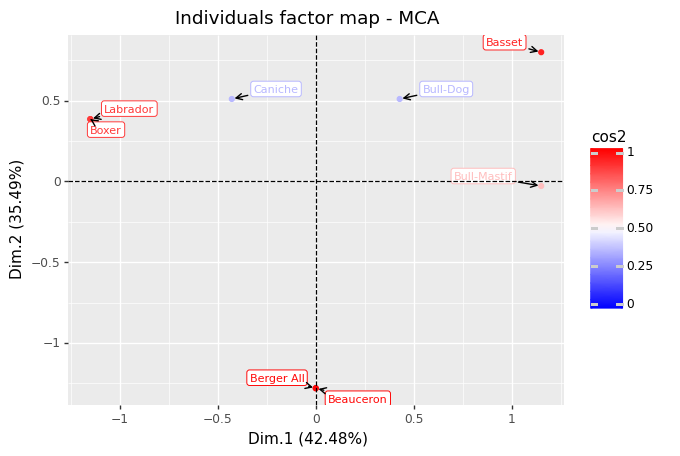

In [74]:
p = fviz_mca_ind(my_mca3,
                 repel=True,
                 color="cos2",
                 text_type="label")
print(p)

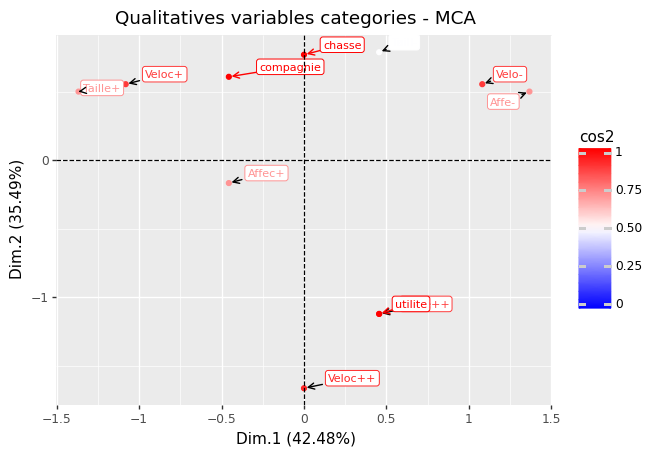

In [76]:
p = fviz_mca_mod(my_mca3,
                 repel=True,
                 color="cos2",
                 text_type="label",
                 short_labels=True,
                 quali_sup=True)
print(p)